In [303]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import completeness_score, homogeneity_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn import decomposition
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.model_selection import KFold
import pylab as pl
from sklearn import neighbors, tree, naive_bayes
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import statistics as stat
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
import math  

%matplotlib inline
os.getcwd()
os.chdir('C:\\Users\\Kristal\\Desktop\\DSC_478 Homework\\Final Project')
os.getcwd()

'C:\\Users\\Kristal\\Desktop\\DSC_478 Homework\\Final Project'

# Introduction

Today I will be taking a look at a set of data from the Internet Movie Database or IMDB for short. This data set before cleaning consists of 39 features and 14761 movies or show episodes.The types of features range from the movies or TV show's rating on IMDB, to the number of award nominations, to the genre of the film itself and many more. The goals of this project were three-fold. First, explore the data to see any surface level trends and how the data may possibly be clustered together. Secondly, to develop a regression model to predict the IMDB rating that a piece of media would get based on the rest of the features that describe it. Thirdly, to develop a classification model to predict whether or not a piece of media has won any awards.

Youtube Video for this Project: https://www.youtube.com/watch?v=VvHDcuEerI0&feature=youtu.be

# Data Loading and Preprocessing

Before loading in the data, I removed two unnecessary columns from the dataset that had the URL for the movie or tv show and the ID number associated with the show.

In [332]:
imdb_df = pd.read_csv('imdb_cleaned.csv',na_values="")
imdb_df.head()

,title,imdbRating,ratingCount,duration,year,type,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,...,Short,Sport,TalkShow,Thriller,War,Western,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43
0,Der Vagabund und das Kind (1921),8.4,40550,3240,1921,video.movie,1,0,19,96,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
1,Goldrausch (1925),8.3,45319,5700,1925,video.movie,2,1,35,110,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2,Metropolis (1927),8.4,81007,9180,1927,video.movie,3,4,67,428,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
3,Der General (1926),8.3,37521,6420,1926,video.movie,1,1,53,123,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
4,Lichter der Großstadt (1931),8.7,70057,5220,1931,video.movie,2,0,38,187,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN


In [334]:
imdb_df.describe(include="all")

,title,imdbRating,ratingCount,duration,year,type,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,...,Short,Sport,TalkShow,Thriller,War,Western,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43
count,14761,13582,13555,13730,14716,14757,14760,14761,14761,14761,...,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,429.000000,42.000000,8.0,1.0
unique,14717,515,8806,656,264,121,133,153,330,1561,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Der Mann\,7.3,7,1800,2011,video.movie,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,12,584,73,902,667,10731,8317,9263,5104,6056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.038209,0.016530,0.035838,0.088612,0.032450,0.022424,0.037296,0.023810,0.0,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.191706,0.127506,0.185892,0.284192,0.177199,0.148063,0.189707,0.154303,0.0,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [335]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14761 entries, 0 to 14760
Data columns (total 44 columns):
title               14761 non-null object
imdbRating          13582 non-null object
ratingCount         13555 non-null object
duration            13730 non-null object
year                14716 non-null object
type                14757 non-null object
nrOfWins            14760 non-null object
nrOfNominations     14761 non-null object
nrOfPhotos          14761 non-null object
nrOfNewsArticles    14761 non-null object
nrOfUserReviews     14761 non-null int64
nrOfGenre           14761 non-null int64
Action              14761 non-null int64
Adult               14761 non-null int64
Adventure           14761 non-null int64
Animation           14761 non-null int64
Biography           14761 non-null int64
Comedy              14761 non-null int64
Crime               14761 non-null int64
Documentary         14761 non-null int64
Drama               14761 non-null int64
Family              

Upon loading in the data I noticed a few things occuring based on the results from the above code. For one, the features of imdbRating, RatingCount, duration, year, type, nrofWins are missing values so I knew I would need to solve this issue. Secondly, there are also 4 bugged columns with no feature data included in the file. These will need to be removed.

In [336]:
bugged = list(imdb_df.columns.values)[-4:]
bugged
imdb_df.drop(bugged,axis=1,inplace=True)   #dropping the 4 bugged columns
imdb_df.drop("year",axis = 1,inplace=True)
imdb_df.head()

,title,imdbRating,ratingCount,duration,type,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,Der Vagabund und das Kind (1921),8.4,40550,3240,video.movie,1,0,19,96,85,...,0,0,0,0,0,0,0,0,0,0
1,Goldrausch (1925),8.3,45319,5700,video.movie,2,1,35,110,122,...,0,0,0,0,0,0,0,0,0,0
2,Metropolis (1927),8.4,81007,9180,video.movie,3,4,67,428,376,...,0,0,0,1,0,0,0,0,0,0
3,Der General (1926),8.3,37521,6420,video.movie,1,1,53,123,219,...,0,0,0,0,0,0,0,0,0,0
4,Lichter der Großstadt (1931),8.7,70057,5220,video.movie,2,0,38,187,186,...,0,0,1,0,0,0,0,0,0,0


In [337]:
imdb_df.dropna(axis=0, inplace=True)  #removed NA values as size of dataset is still plenty high to get by without imputing N/A's
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12803 entries, 0 to 14760
Data columns (total 39 columns):
title               12803 non-null object
imdbRating          12803 non-null object
ratingCount         12803 non-null object
duration            12803 non-null object
type                12803 non-null object
nrOfWins            12803 non-null object
nrOfNominations     12803 non-null object
nrOfPhotos          12803 non-null object
nrOfNewsArticles    12803 non-null object
nrOfUserReviews     12803 non-null int64
nrOfGenre           12803 non-null int64
Action              12803 non-null int64
Adult               12803 non-null int64
Adventure           12803 non-null int64
Animation           12803 non-null int64
Biography           12803 non-null int64
Comedy              12803 non-null int64
Crime               12803 non-null int64
Documentary         12803 non-null int64
Drama               12803 non-null int64
Family              12803 non-null int64
Fantasy             1

Above I have removed the 4 bugged columns and any rows that contained missing values. I removed the missing value rows instead of imputing them because I would find later on that the data was skewed, and imputing these values with the mean value would simply make that worse. Additionally, the number of rows with missing values was small enough that I am left with a sample size plenty large enough for analysis and model building. Upon completing this, I noticed another issue though. The data types for the first 9 features were almost all wrong. Going back and looking at the Excel file, I found that random rows had the data within them shifted by one or several columns, most likely by an error from whomever pulled this data from the IMDB website. I endeavored to fix this below.

In [338]:
# Data Type Corrections
imdb_df = imdb_df[~imdb_df.imdbRating.str.contains('[a-zA-Z ]')]    #removed rows with string objects misplaced in this column
imdb_df["imdbRating"] = imdb_df['imdbRating'].astype('float64')
imdb_df = imdb_df[~imdb_df.ratingCount.str.contains('[a-zA-Z ]')]   #removed rows with string objects misplaced in this column
imdb_df["ratingCount"] = imdb_df['ratingCount'].astype('int64')
imdb_df["duration"] = imdb_df['duration'].astype('int64')                      
imdb_df["nrOfWins"] = imdb_df['nrOfWins'].astype('int64')
imdb_df["nrOfNominations"] = imdb_df['nrOfNominations'].astype('int64')
imdb_df["nrOfPhotos"] = imdb_df['nrOfPhotos'].astype('int64')
imdb_df["nrOfNewsArticles"] = imdb_df['nrOfNewsArticles'].astype('int64')
imdb_df["nrOfUserReviews"] = imdb_df['nrOfUserReviews'].astype('int64')
imdb_df["nrOfGenre"] = imdb_df['nrOfGenre'].astype('int64')
imdb_df = imdb_df[~imdb_df.type.str.contains('[0-9]')]
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12405 entries, 0 to 14760
Data columns (total 39 columns):
title               12405 non-null object
imdbRating          12405 non-null float64
ratingCount         12405 non-null int64
duration            12405 non-null int64
type                12405 non-null object
nrOfWins            12405 non-null int64
nrOfNominations     12405 non-null int64
nrOfPhotos          12405 non-null int64
nrOfNewsArticles    12405 non-null int64
nrOfUserReviews     12405 non-null int64
nrOfGenre           12405 non-null int64
Action              12405 non-null int64
Adult               12405 non-null int64
Adventure           12405 non-null int64
Animation           12405 non-null int64
Biography           12405 non-null int64
Comedy              12405 non-null int64
Crime               12405 non-null int64
Documentary         12405 non-null int64
Drama               12405 non-null int64
Family              12405 non-null int64
Fantasy             12405 

In [339]:
imdb_df.reset_index(drop=True, inplace=True)
imdb_df.head()

,title,imdbRating,ratingCount,duration,type,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,Der Vagabund und das Kind (1921),8.4,40550,3240,video.movie,1,0,19,96,85,...,0,0,0,0,0,0,0,0,0,0
1,Goldrausch (1925),8.3,45319,5700,video.movie,2,1,35,110,122,...,0,0,0,0,0,0,0,0,0,0
2,Metropolis (1927),8.4,81007,9180,video.movie,3,4,67,428,376,...,0,0,0,1,0,0,0,0,0,0
3,Der General (1926),8.3,37521,6420,video.movie,1,1,53,123,219,...,0,0,0,0,0,0,0,0,0,0
4,Lichter der Großstadt (1931),8.7,70057,5220,video.movie,2,0,38,187,186,...,0,0,1,0,0,0,0,0,0,0


In [340]:
imdb_titles = imdb_df['title']                            #stored titles here
imdb_df.drop('title',axis=1,inplace=True)

In [341]:
imdb_ssf = pd.get_dummies(imdb_df)

In [342]:
imdb_ssf.describe(include='all')

,imdbRating,ratingCount,duration,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,Action,...,SciFi,Short,Sport,TalkShow,Thriller,War,Western,type_video.episode,type_video.movie,type_video.tv
count,12405.000000,1.240500e+04,12405.000000,12405.000000,12405.000000,12405.000000,12405.000000,12405.000000,12405.000000,12405.000000,...,12405.000000,12405.000000,12405.000000,12405.000000,12405.000000,12405.000000,12405.000000,12405.000000,12405.000000,12405.000000
mean,6.872374,2.814770e+04,5625.839903,3.552842,5.176622,26.836195,286.417654,119.666586,2.328497,0.163482,...,0.072874,0.034180,0.017170,0.011286,0.100685,0.036195,0.024667,0.079565,0.817090,0.103345
std,1.103029,6.721636e+04,2703.552539,9.889753,17.095757,65.171316,1098.677129,244.838441,0.770944,0.369820,...,0.259940,0.181698,0.129912,0.105638,0.300924,0.186783,0.155116,0.270629,0.386608,0.304422
min,1.000000,5.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.300000,7.970000e+02,4680.000000,0.000000,0.000000,2.000000,0.000000,10.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,7.000000,4.645000e+03,5760.000000,0.000000,0.000000,10.000000,18.000000,42.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,7.600000,2.332700e+04,6720.000000,3.000000,4.000000,30.000000,137.000000,123.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.600000,1.183395e+06,68400.000000,226.000000,542.000000,1436.000000,25582.000000,4928.000000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


After fixing the feature data types, I stored the movie and show titles in case I wanted to look at information for a specific one later. The datasets genre variables already came in the proper format as dummy variables but I still had to convert the type of media feature to a dummy variable so I did that as well.

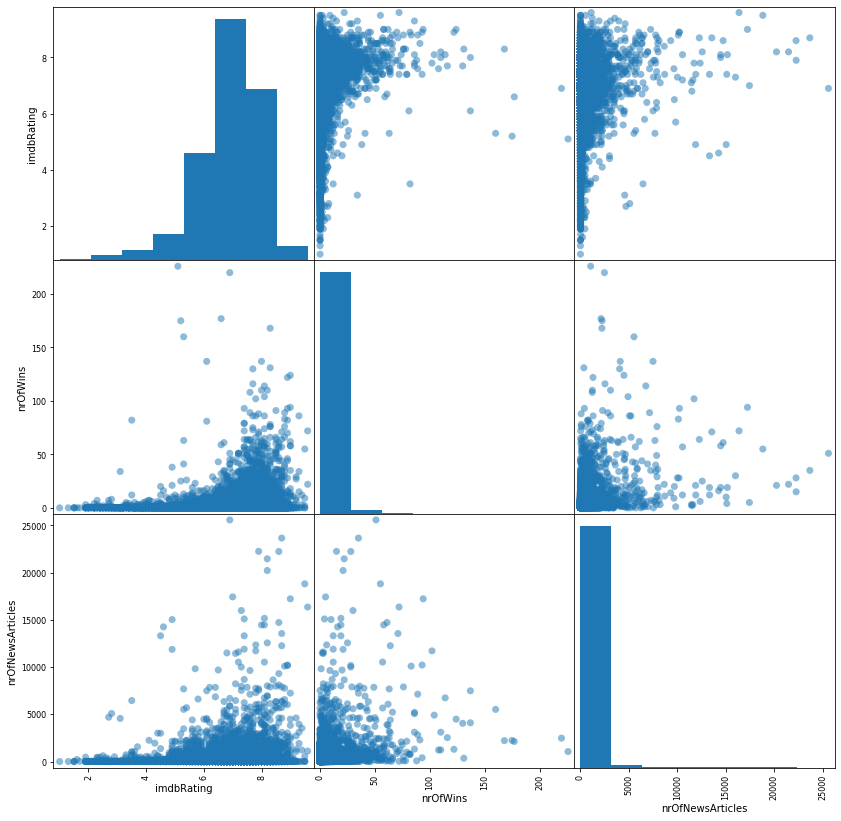

In [343]:
pd.plotting.scatter_matrix(imdb_ssf[["imdbRating","nrOfWins","nrOfNewsArticles"]], figsize=(14,14), hist_kwds={'bins':8}, alpha=.5, marker='o', s=50);

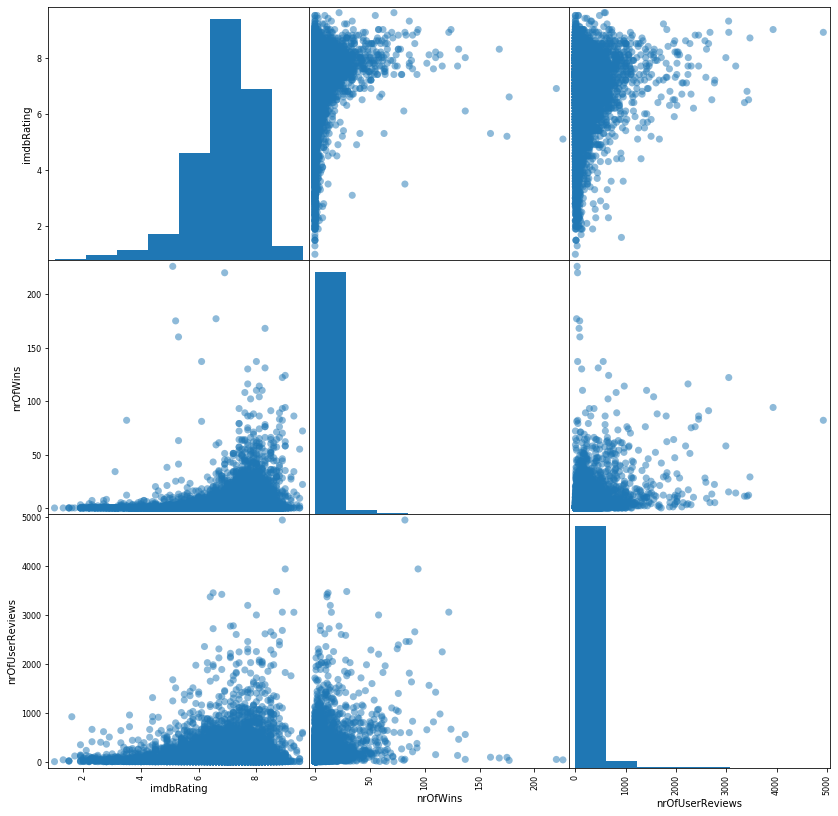

In [13]:
pd.plotting.scatter_matrix(imdb_ssf[["imdbRating","nrOfWins","nrOfUserReviews"]], figsize=(14,14), hist_kwds={'bins':8}, alpha=.5, marker='o', s=50);

Above I created scatter plot matrices to visualize the distribution of some of my key variables of interest and how they related to these other key variables. This led to some notable findings. For one, almost all these variables have data that is incredibly skewed with large outliers that would surely effect any model building that would be performed. Secondly, there seemed IMDB rating scores on average hover around the 7 mark and very few movie or tv shows are given a rating above 9 or below 6. My first task for improving this was going through and trimming down the variables with overly skewed distributions due to extreme outliers in the data.

In [344]:
imdb_ssf.drop(imdb_ssf[imdb_ssf.nrOfUserReviews > 2000].index, inplace=True)   #dropping outliers
imdb_ssf.drop(imdb_ssf[imdb_ssf.nrOfWins > 100].index, inplace=True)
imdb_ssf.drop(imdb_ssf[imdb_ssf.nrOfNewsArticles > 6000].index, inplace=True)

In [346]:
imdb_ssf.describe(include='all')

,imdbRating,ratingCount,duration,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,Action,...,SciFi,Short,Sport,TalkShow,Thriller,War,Western,type_video.episode,type_video.movie,type_video.tv
count,12275.000000,12275.000000,12275.000000,12275.000000,12275.000000,12275.000000,12275.000000,12275.000000,12275.000000,12275.000000,...,12275.000000,12275.000000,12275.000000,12275.000000,12275.000000,12275.000000,12275.000000,12275.000000,12275.000000,12275.000000
mean,6.864505,25197.957556,5619.061833,3.139226,4.430305,24.403340,210.224929,107.950224,2.326110,0.160896,...,0.071446,0.034542,0.017352,0.011242,0.100611,0.036334,0.024847,0.080407,0.818574,0.101018
std,1.100102,55852.156581,2702.556071,7.561507,12.513506,52.812249,575.485533,188.631429,0.770969,0.367450,...,0.257579,0.182623,0.130586,0.105437,0.300825,0.187128,0.155666,0.271934,0.385386,0.301365
min,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.300000,773.500000,4680.000000,0.000000,0.000000,2.000000,0.000000,10.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,7.000000,4515.000000,5760.000000,0.000000,0.000000,10.000000,17.000000,41.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,7.600000,22246.500000,6720.000000,3.000000,4.000000,29.000000,130.000000,119.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.600000,911042.000000,68400.000000,93.000000,418.000000,1430.000000,5901.000000,1980.000000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


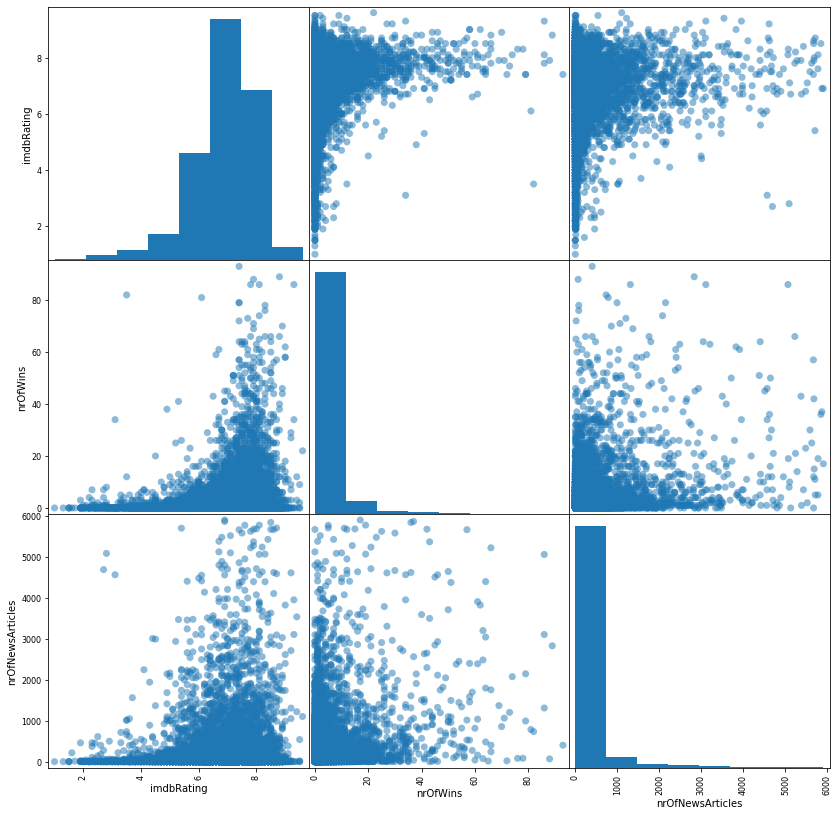

In [347]:
pd.plotting.scatter_matrix(imdb_ssf[["imdbRating","nrOfWins","nrOfNewsArticles"]], figsize=(14,14), hist_kwds={'bins':8}, alpha=.5, marker='o', s=50);

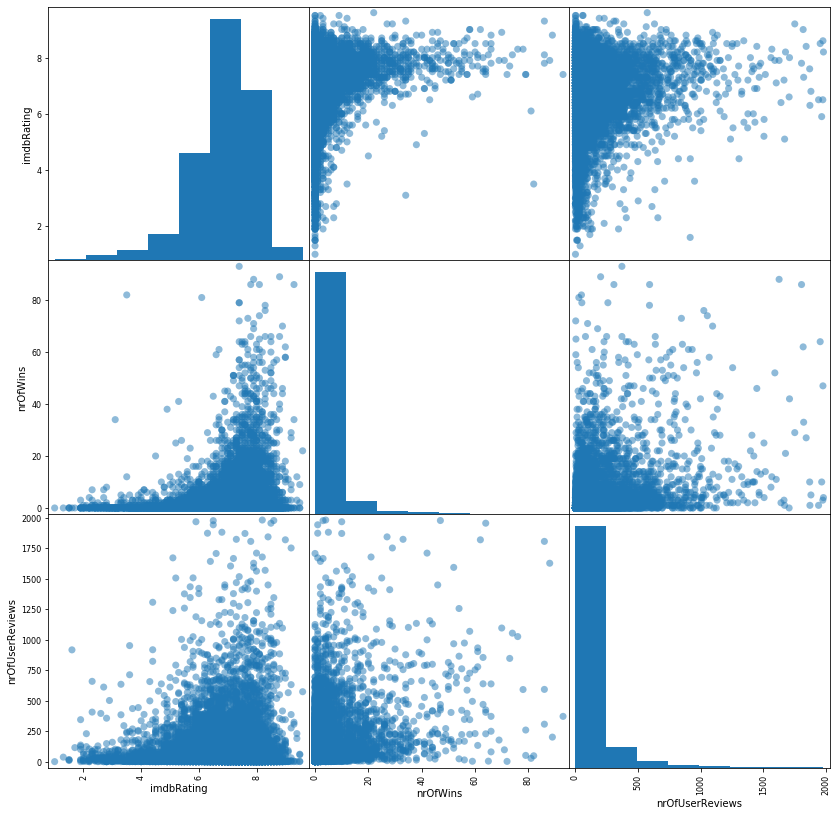

In [18]:
pd.plotting.scatter_matrix(imdb_ssf[["imdbRating","nrOfWins","nrOfUserReviews"]], figsize=(14,14), hist_kwds={'bins':8}, alpha=.5, marker='o', s=50);

Better - but data is still heavily skewed. More outlier removal!

In [348]:
imdb_ssf.drop(imdb_ssf[imdb_ssf.nrOfUserReviews > 500].index, inplace=True)   #dropping more outliers
imdb_ssf.drop(imdb_ssf[imdb_ssf.nrOfWins > 20].index, inplace=True)
imdb_ssf.drop(imdb_ssf[imdb_ssf.nrOfNewsArticles > 1500].index, inplace=True)
imdb_ssf.describe()

,imdbRating,ratingCount,duration,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,Action,...,SciFi,Short,Sport,TalkShow,Thriller,War,Western,type_video.episode,type_video.movie,type_video.tv
count,11221.000000,11221.000000,11221.000000,11221.000000,11221.000000,11221.000000,11221.000000,11221.000000,11221.000000,11221.000000,...,11221.000000,11221.000000,11221.000000,11221.000000,11221.000000,11221.000000,11221.000000,11221.000000,11221.000000,11221.000000
mean,6.826085,14713.318956,5534.770876,1.836200,2.559398,17.988236,97.125212,70.442830,2.309865,0.152838,...,0.066661,0.037608,0.018269,0.011407,0.093040,0.037697,0.026646,0.087960,0.815524,0.096515
std,1.101110,27935.677199,2706.181070,3.519198,5.859934,31.722176,213.280643,92.185274,0.776642,0.359848,...,0.249445,0.190255,0.133930,0.106198,0.290501,0.190471,0.161055,0.283249,0.387889,0.295310
min,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.300000,629.000000,4560.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,7.000000,3563.000000,5700.000000,0.000000,0.000000,8.000000,11.000000,35.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,7.600000,15253.000000,6600.000000,2.000000,3.000000,23.000000,81.000000,94.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.500000,364585.000000,68400.000000,20.000000,89.000000,838.000000,1497.000000,499.000000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


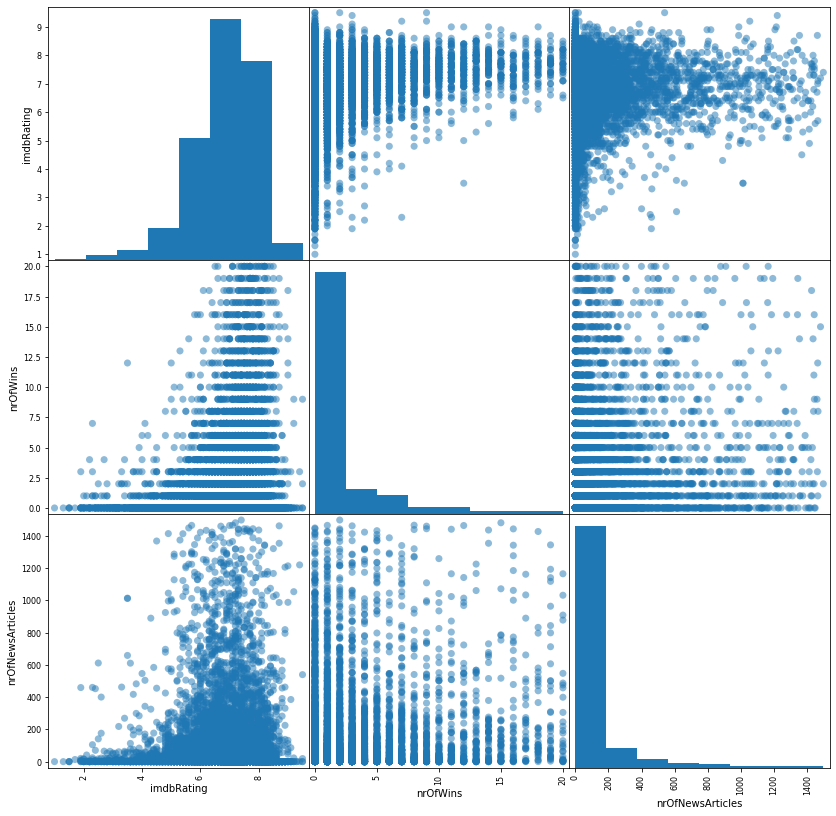

In [349]:
pd.plotting.scatter_matrix(imdb_ssf[["imdbRating","nrOfWins","nrOfNewsArticles"]], figsize=(14,14), hist_kwds={'bins':8}, alpha=.5, marker='o', s=50);

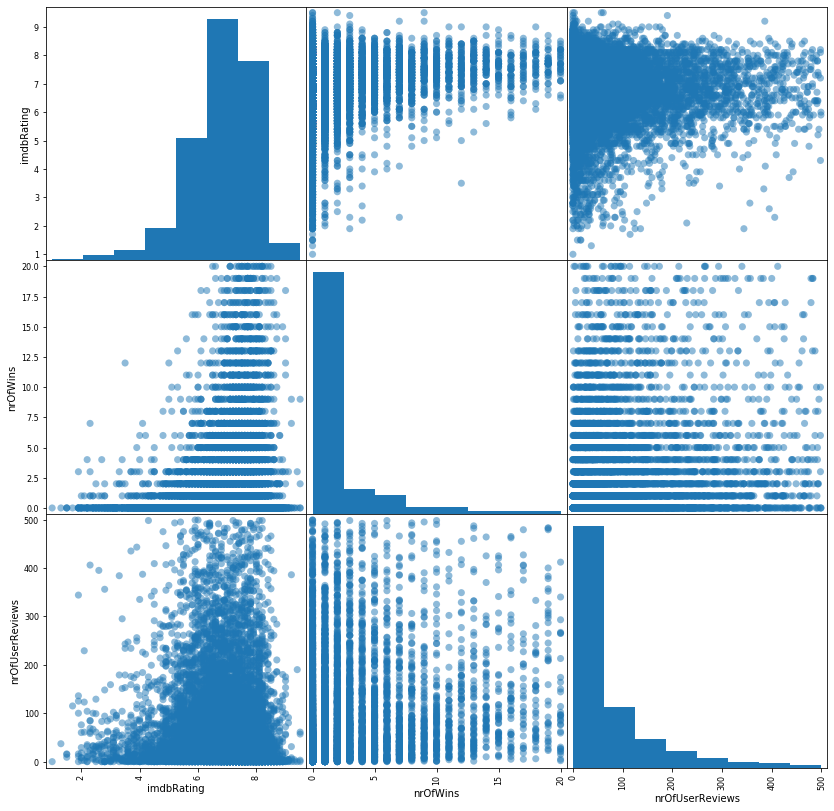

In [350]:
pd.plotting.scatter_matrix(imdb_ssf[["imdbRating","nrOfWins","nrOfUserReviews"]], figsize=(14,14), hist_kwds={'bins':8}, alpha=.5, marker='o', s=50);

In [351]:
print(imdb_ssf[imdb_ssf["nrOfWins"] > 0].count()[1]) #counts the number of media that have won at least 1 award

4783


0.5737456554674272 % of items have not won an award
0.4262543445325729 % of items have won an award


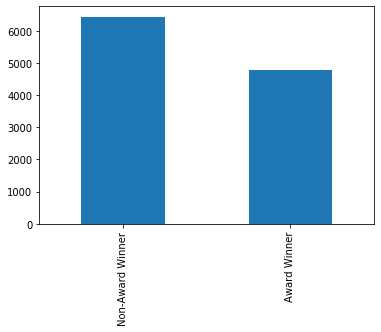

In [352]:
award_split = pd.DataFrame(np.where(imdb_ssf['nrOfWins']>0, 'Award Winner', 'Non-Award Winner'))
award_split.columns = ['Winner or Not']
award_split["Winner or Not"].value_counts().plot(kind='bar')
print((imdb_ssf[imdb_ssf["nrOfWins"] <= 0].count()[1])/11221,"% of items have not won an award")
print((imdb_ssf[imdb_ssf["nrOfWins"] > 0].count()[1])/11221,"% of items have won an award")

Balancing between removing too much data and and improving the skewness of the data was tricky and I went through two rounds of it above, but I eventually landed on a final dataset that contained 11,221 movies or TV shows. Although the distribution of some features was still skewed, this would surely perform much better than using the initial dataset with all the outliers still in it. I was also able to see that of our 11,221 items, 4783 of them have won an award of some kind, or approximately 43% of the items. This meant for the classification portion of the project I did not need to worry too much about having an imbalanced class problem due to the near even split between award winners and non-award winners. 

In [353]:
min_max_scaler = preprocessing.MinMaxScaler().fit(imdb_ssf)
imdb_norm = min_max_scaler.transform(imdb_ssf)
imdb_norm = pd.DataFrame(imdb_norm, columns=imdb_ssf.columns, index=imdb_ssf.index)  #min-max normalized dataframe
imdb_norm.head()

,imdbRating,ratingCount,duration,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,Action,...,SciFi,Short,Sport,TalkShow,Thriller,War,Western,type_video.episode,type_video.movie,type_video.tv
0,0.870588,0.111210,0.047341,0.05,0.000000,0.022673,0.064128,0.170341,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.858824,0.124291,0.083307,0.10,0.011236,0.041766,0.073480,0.244489,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.870588,0.222179,0.134185,0.15,0.044944,0.079952,0.285905,0.753507,0.666667,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.858824,0.102902,0.093833,0.05,0.011236,0.063246,0.082164,0.438878,1.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.905882,0.192144,0.076289,0.10,0.000000,0.045346,0.124916,0.372745,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


The final step of my pre-processing was performing min-max normalization on my data set due to the extreme difference in scale of some of the features. Rating Count values could range from the tens to hundreds of thousands where as the IMDB rating only ranged from 1-10 so normalization was strongly needed in order to prevent certain features from over or under influencing the models done later in the project.

# Exploratory Clustering and PCA

In [354]:
def cluster_sizes(clusters,data):
    #clusters is an array of cluster labels for each instance in the data
    
    size = {}
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    for c in cluster_labels:
        size[c] = len(data[clusters == c])
    return size

The next step of my data exploration was to see how the data would cluster itself and how high quality these clusters would be. If I could find high quality clusters, they could possibly be used for classification later on in the project or at least tell us a bit more about the dataset itself. Since I knew that my dataset had a high number of features, I also decided to look into performing Principle Component Analysis to perform some dimensionality reduction which would help improve computation speed as well as potentially reduce noise in the data for better clusters.

In [355]:
kmeans = KMeans(n_clusters=5, max_iter=500, verbose=0) 

In [361]:
kmeans.fit(imdb_norm)
clusters = kmeans.predict(imdb_norm)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=imdb_norm.columns)
centroids

,imdbRating,ratingCount,duration,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,Action,...,SciFi,Short,Sport,TalkShow,Thriller,War,Western,type_video.episode,type_video.movie,type_video.tv
0,0.641417,0.075396,0.084265,0.066297,0.026987,0.033139,0.101151,0.212979,0.949659,0.997440,...,0.129693,0.006826,0.005973,2.307182e-16,0.156997,0.011092,0.023038,2.389078e-02,8.600683e-01,1.160410e-01
1,0.653646,0.053560,0.086387,0.090502,0.026521,0.025528,0.074037,0.163313,0.789868,0.014017,...,0.026927,0.030985,0.021763,-3.816392e-16,0.022132,0.019550,0.012541,7.355228e-16,1.000000e+00,2.067790e-15
2,0.760836,0.010353,0.047862,0.061621,0.036213,0.018983,0.052664,0.036737,0.699370,0.040923,...,0.080273,0.013116,0.006821,6.558237e-02,0.011542,0.010493,0.011018,5.031480e-01,3.108624e-14,4.968520e-01
3,0.650811,0.026626,0.074278,0.048796,0.011501,0.013098,0.045454,0.127187,0.651597,0.000491,...,0.136118,0.133661,0.017199,1.474201e-03,0.204423,0.018673,0.070270,7.216450e-16,1.000000e+00,9.436896e-16
4,0.704383,0.042745,0.097834,0.144363,0.037307,0.020602,0.063549,0.165690,0.802571,0.126288,...,0.027377,0.009714,0.026788,9.020562e-17,0.106565,0.088019,0.021784,-3.330669e-15,1.000000e+00,-2.498002e-15


In [362]:
size = cluster_sizes(clusters,imdb_norm)

for c in size.keys():
    print("Size of Cluster", c, "= ", size[c])

Size of Cluster 0 =  1172
Size of Cluster 1 =  2711
Size of Cluster 2 =  1906
Size of Cluster 3 =  2035
Size of Cluster 4 =  3397


In [363]:
silhouettes = metrics.silhouette_samples(imdb_norm, clusters)
print(silhouettes.mean())

0.14858328220846745


Initial clustering results were not stellar. Silhouette Mean is only .15, meaning the clusters are not very high quality. This dataset has a lot of features and is extremely noisy. Although I could attempt to improve the kmeans clustering by changing k, I first decided to perform PCA in order to reduce the amount of features and noise in the data. Then I would use my principle components for clustering.

In [37]:
pca = decomposition.PCA(n_components=5)
imdb_pca = pca.fit(imdb_norm).transform(imdb_norm)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.15523365 0.10776331 0.09164978 0.07919714 0.06786548]
0.5017093611412657


This PCA with 5 components only explains 50% of the variance in the data. I needed to adjust the number of components to obtain at least 60% explained variance as well as create a Scree plot to visualize my PCA and help me select the correct number of components.

In [40]:
pca = decomposition.PCA(n_components=8)
imdb_pca = pca.fit(imdb_norm).transform(imdb_norm)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.15523366 0.10776335 0.09164995 0.07919813 0.0678671  0.04826733
 0.04556042 0.04259219]
0.6381321306670762


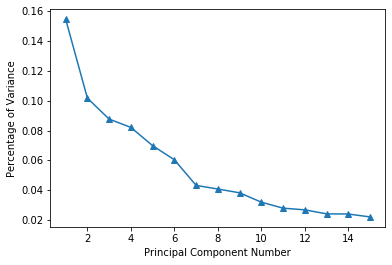

In [227]:
pca = decomposition.PCA(n_components=15)
imdb_pca = pca.fit(imdb_norm).transform(imdb_norm)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 16), pca.explained_variance_ratio_, marker='^')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.show()

In [224]:
pca = decomposition.PCA(n_components=8)
imdb_pca = pca.fit(imdb_norm).transform(imdb_norm)

imdb_pca = pd.DataFrame(imdb_pca)
imdb_pca.head()

,0,1,2,3,4,5,6,7
0,-0.301858,0.873145,0.181136,-0.195281,0.147613,-0.112680,-0.266320,-0.596295
1,0.307649,0.450126,1.020170,-0.152004,0.222510,-0.379113,-0.228223,-0.549219
2,-0.758020,0.099167,0.049901,0.098062,-0.347502,-0.096520,0.010615,-0.205238
3,0.199875,0.124729,1.187236,0.025498,0.748114,-0.341653,-0.256386,0.122622
4,-0.477357,1.044148,0.023555,-0.524140,0.231872,-0.159747,0.378070,0.246993


Above is shown the PCA analysis as well as the Scree plot associated with it. Looking for the number of PC's at the elbow of the Scree plot as well as making sure the principal components explain at least 60% of the variance in the data led to a total of 8 principal components. This PCA with 8 components explains ~64% of the variance in the data. With these PC's calculated, I attempted clustering again to see if my results would improve.

In [43]:
kmeans = KMeans(n_clusters=5, max_iter=500, verbose=0)
kmeans.fit(imdb_pca)
clusters = kmeans.predict(imdb_pca)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=imdb_pca.columns)
centroids

,0,1,2,3,4,5,6,7
0,0.033196,-0.562599,-0.162143,-0.455107,0.052822,0.036424,-0.024386,0.140676
1,-0.194966,-0.603734,0.178228,0.621579,-0.058886,-0.082848,0.222939,-0.216585
2,0.733279,0.324085,0.702153,-0.110899,0.001435,0.083535,0.039888,-0.037258
3,-0.675737,0.207501,0.032758,-0.121590,-0.062587,-0.006206,-0.059861,0.042700
4,0.339401,0.300818,-0.504399,0.186408,0.064461,-0.029455,-0.070796,-0.000058


In [44]:
size = cluster_sizes(clusters,imdb_pca)

for c in size.keys():
    print("Size of Cluster", c, "= ", size[c])

Size of Cluster 0 =  2173
Size of Cluster 1 =  1716
Size of Cluster 2 =  2056
Size of Cluster 3 =  3343
Size of Cluster 4 =  2987


In [45]:
silhouettes = metrics.silhouette_samples(imdb_pca, clusters)
print(silhouettes.mean())

0.27787205435957474


The new silhouette mean calculated from performing kmeans cluster analysis on the principle components from above is now ~.28 instead of the .15 from before the use of PCA on the data, a .13 improvement. In order to further improve the clustering, I decided to try some different values of K in hopes that the silhouette mean between all the clusters could be improved.

In [51]:
for i in range(2,41):                                      #29 movie genres - guessing perhaps movies cluster by genre
    kmeans = KMeans(n_clusters=i, max_iter=500, verbose=0)
    kmeans.fit(imdb_pca)
    clusters = kmeans.predict(imdb_pca)
    silhouettes = metrics.silhouette_samples(imdb_pca, clusters)
    print("The silhouette mean for ",i," clusters is ",silhouettes.mean())

The silhouette mean for  2  clusters is  0.22117738295273365
The silhouette mean for  3  clusters is  0.25537726617052064
The silhouette mean for  4  clusters is  0.26746994417468795
The silhouette mean for  5  clusters is  0.2787164237633919
The silhouette mean for  6  clusters is  0.29338835214619197
The silhouette mean for  7  clusters is  0.30624160122635297
The silhouette mean for  8  clusters is  0.3258691064603262
The silhouette mean for  9  clusters is  0.33953249598199536
The silhouette mean for  10  clusters is  0.351127432220484
The silhouette mean for  11  clusters is  0.3737278300688553
The silhouette mean for  12  clusters is  0.38659096348902894
The silhouette mean for  13  clusters is  0.40793946092836847
The silhouette mean for  14  clusters is  0.4139063478348974
The silhouette mean for  15  clusters is  0.43304123126156424
The silhouette mean for  16  clusters is  0.4375227394410267
The silhouette mean for  17  clusters is  0.4548068897150488
The silhouette mean for 

Looking at the above outputs - it seems that at 33 Clusters the silhouette score peaks while also trying to keep the least amount of clusters possible. The large amount of clusters needed to get peak silhouette scores and higher quality clusters for this dataset tells us that this data is extremely varied and it would be unwise to perform classification by cluster assignment due to how noisy the data is even after PCA. Never the less, the use of PCA did significantly improve our clustering and we will also use PCA going forward for further analysis to see if it could possibly improve the models.

# Regression - predicting IMDB Rating

When I first saw this dataset, my first thought was "could I possibly build a model to predict the rating media on imdb gets based off the rest of the features shown". This is what I have attempted below.

In [86]:
def plot_coefficients(model, n_features, feature_names):
    plt.figure(figsize=(10,20))
    pl.barh(range(n_features), model.coef_, align='center')
    pl.yticks(np.arange(n_features), feature_names)
    pl.xlabel("Coefficient Value")
    pl.ylabel("Feature")
    pl.ylim(-1, n_features)

In [258]:
def cross_validate(model, X, y, n, verbose=False):
    # model: regression model to be trained
    # X: the data matrix
    # y: the target variable array
    # n: the number of fold for x-validation
    # Returns mean RMSE across all folds
    
    
    kf = KFold(n_splits=n, random_state=22)
    xval_err = 0
    f = 1
    for train,test in kf.split(X):
        model.fit(X[train],y[train])
        p = model.predict(X[test])
        e = p-y[test]
        rmse = np.sqrt(np.dot(e,e)/len(X[test]))
        if verbose:
            print("Fold %2d RMSE: %.4f" % (f, rmse))
        xval_err += rmse
        f += 1
    return xval_err/n

In [159]:
def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
        
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred),"\n")
      
    if show_confussion_matrix:
        print("Confussion matrix")
        print(metrics.confusion_matrix(y, y_pred),"\n")
    

In [164]:
def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):

        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = clf.score(X[train], y[train])
            k_test_scores[j] = clf.score(X[test], y[test])
            j += 1
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        print(param_name, '=', param_value, "Train =", train_scores[i], "Test =", test_scores[i])
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

In [318]:
def calc_params_regress(X, y, clf, param_values, param_name, K):# I took your calc params function and altered it for regression
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):

        # set regression parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):
            # fit the regression in the corresponding fold
            # and obtain the corresponding RMSE scores on train and test sets
            clf.fit(X[train],y[train])
            p = clf.predict(X[train])
            p2 = clf.predict(X[test])
            e = p-y[train]
            e2 = p2-y[test]
            rmse = np.sqrt(np.dot(e,e)/len(X[train]))
            rmse2 = np.sqrt(np.dot(e2,e2)/len(X[test]))
            k_train_scores[j] = rmse
            k_test_scores[j] = rmse2
            j += 1
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        print(param_name, '=', param_value, "Train =", train_scores[i], "Test =", test_scores[i])
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation RMSE")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

In [242]:
def plot_feature_importances(model, n_features, feature_names):
    plt.figure(figsize=(10,20))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [247]:
reg_target = imdb_norm['imdbRating']  #separating target variable imdbRating
reg_target.head()

0    0.860465
1    0.848837
2    0.860465
3    0.848837
4    0.895349
Name: imdbRating, dtype: float64

In [248]:
imdb_reg = imdb_norm.drop('imdbRating',axis=1)  #remove target variable from feature dataframe
imdb_reg.head()

,ratingCount,duration,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,Action,Adult,...,Short,Sport,TalkShow,Thriller,War,Western,type_video.episode,type_video.movie,type_video.tv,Award Winner
0,0.044504,0.047341,0.010753,0.000000,0.013287,0.016268,0.042929,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,0.049739,0.083307,0.021505,0.002392,0.024476,0.018641,0.061616,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,0.088912,0.134185,0.032258,0.009569,0.046853,0.072530,0.189899,0.666667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,0.041179,0.093833,0.010753,0.002392,0.037063,0.020844,0.110606,1.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,0.076893,0.076289,0.021505,0.000000,0.026573,0.031690,0.093939,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [249]:
x_train, x_test, y_train, y_test = train_test_split(imdb_reg, reg_target, test_size=0.2, random_state=33)

The above shows the creation of our target dataframe and feature dataframe for simple linear regression and then the 80/20 train/test split in order to have test data for calculating the models RMSE value.

In [250]:
linreg = LinearRegression()
linreg.fit(x_train,y_train)
pred = linreg.predict(x_train)
err = abs(pred-y_train)
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(pred))
print("RMSE on Training Data: ", rmse_train)

RMSE on Training Data:  0.10710945635400261


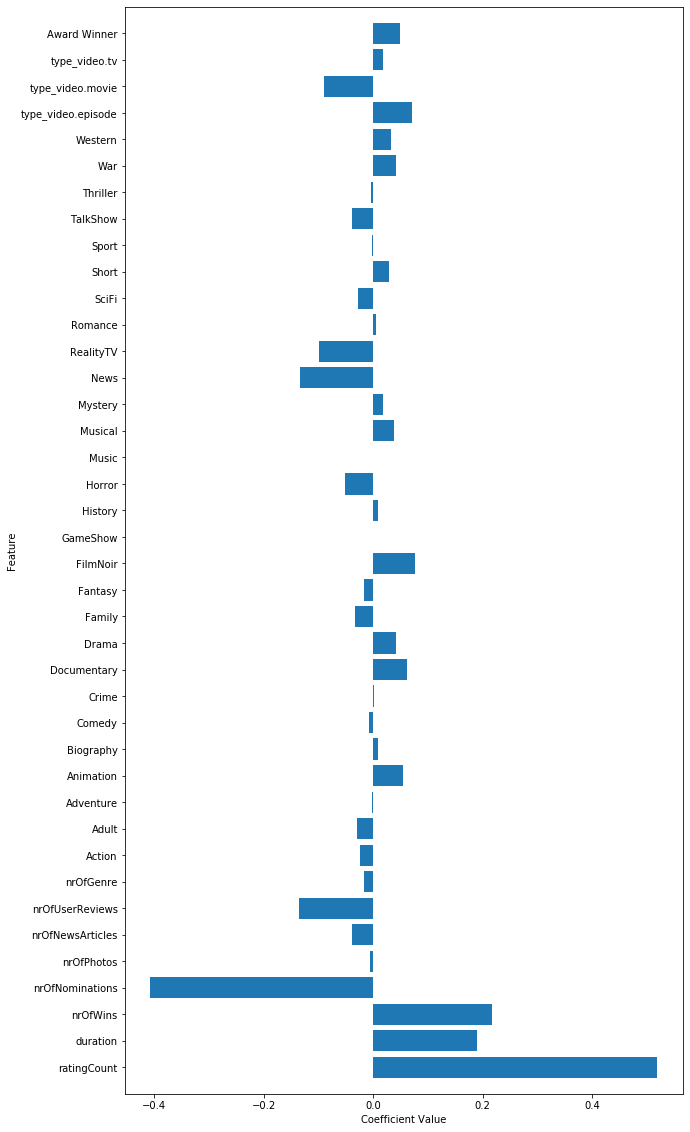

In [251]:
plot_coefficients(linreg, len(imdb_reg.columns), imdb_reg.columns)

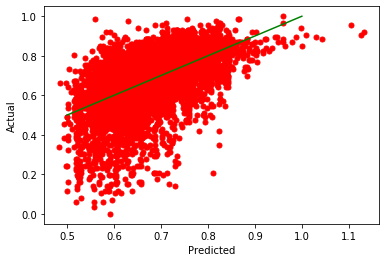

In [252]:
pl.plot(pred, y_train,'ro', markersize=5)  #Predicted vs. Actual Scatterplot for normalized IMDB Ratings
pl.plot([.5,1],[.5,1], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()

In [259]:
rmse_10cv = cross_validate(linreg, np.array(x_train), np.array(y_train), 10, verbose=True)

Fold  1 RMSE: 0.1133
Fold  2 RMSE: 0.1023
Fold  3 RMSE: 0.1039
Fold  4 RMSE: 0.1117
Fold  5 RMSE: 0.1018
Fold  6 RMSE: 0.1155
Fold  7 RMSE: 0.1075
Fold  8 RMSE: 0.1112
Fold  9 RMSE: 0.1032
Fold 10 RMSE: 0.1041


In [260]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 0.1071
RMSE on 10-fold CV: 0.1074


The simple linear regression model performed above tells a few things about what results to look for in our further regression models as well as what features are dominating the analysis. The initial RMSE from the training data is .1071 and after 10 fold cross validation the RMSE became .1074. Since this is the RMSE on the normalized IMDB rating value which exists between 1 and 0, this initial model has an error rate of being off by about 1 in the intial 1 to 10 rating system. Additionally, we can see that the features most important to this regression model are by far: the number of ratings received, the number of award nominations, and the number of awards received. Seeing the negative coefficient for the number of nominations is especially interesting as it shows the inverse relationship between an increase in the IMDB rating and the number of nominations a TV show or movie has. With this simple untuned linear regression model complete, I can now look at trying it with principle components from PCA to see if I can get similar or better results.

Now lets convert the data into principal components and see how it changes the regression analysis.

In [261]:
pca = decomposition.PCA(n_components=8)
imdb_pca_reg = pca.fit(imdb_reg).transform(imdb_reg)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.15549305 0.10189378 0.08817991 0.0821138  0.07024071 0.06083578
 0.04346799 0.04104679]
0.643271814785114


In [262]:
imdb_pca_reg = pd.DataFrame(imdb_pca_reg)
imdb_pca_reg.columns = ['PC 1','PC 2','PC 3','PC 4','PC 5','PC 6','PC 7','PC 8']
imdb_pca_reg.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8
0,-0.296280,0.872138,0.167202,-0.186914,0.150786,-0.112254,-0.274279,-0.593034
1,0.311436,0.454979,1.013567,-0.183876,0.233653,-0.378247,-0.227597,-0.557575
2,-0.753749,0.087801,0.056192,0.083295,-0.345273,-0.096466,0.008669,-0.203423
3,0.202765,0.129195,1.188691,-0.013061,0.760177,-0.339961,-0.243495,0.121988
4,-0.470932,1.046756,-0.001556,-0.508947,0.240704,-0.158822,0.392353,0.233646


In [263]:
x_train, x_test, y_train, y_test = train_test_split(imdb_pca_reg, reg_target, test_size=0.2, random_state=33)

In [264]:
linreg_pca = LinearRegression()
linreg_pca.fit(x_train,y_train)
pred = linreg_pca.predict(x_train)
err = abs(pred-y_train)
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(pred))
print("RMSE on Training Data: ", rmse_train)

RMSE on Training Data:  0.11571083823063784


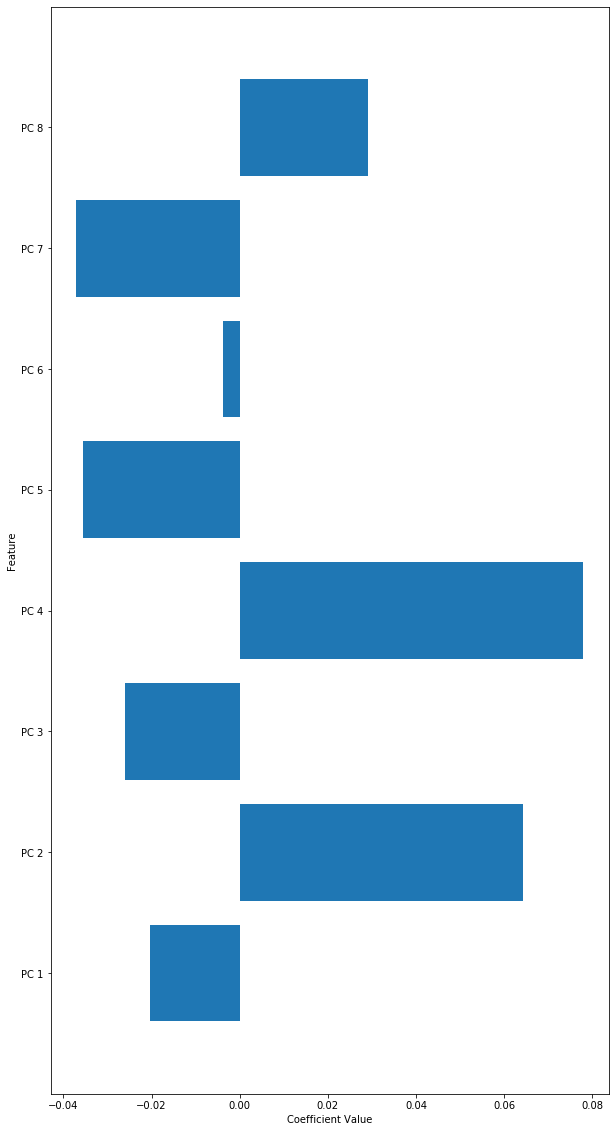

In [265]:
plot_coefficients(linreg_pca, len(imdb_pca_reg.columns), imdb_pca_reg.columns)

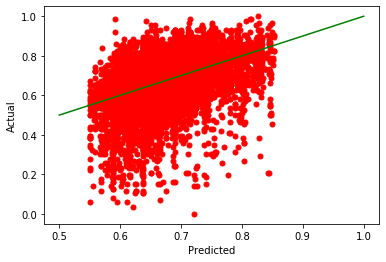

In [266]:
pl.plot(pred, y_train,'ro', markersize=5)
pl.plot([.5,1],[.5,1], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()

In [267]:
rmse_10cv = cross_validate(linreg_pca, np.array(x_train), np.array(y_train), 10, verbose=True)

Fold  1 RMSE: 0.1200
Fold  2 RMSE: 0.1088
Fold  3 RMSE: 0.1104
Fold  4 RMSE: 0.1205
Fold  5 RMSE: 0.1106
Fold  6 RMSE: 0.1226
Fold  7 RMSE: 0.1158
Fold  8 RMSE: 0.1206
Fold  9 RMSE: 0.1136
Fold 10 RMSE: 0.1145


In [268]:
method_name = 'Simple Linear Regression with PCA'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression with PCA
RMSE on training: 0.1157
RMSE on 10-fold CV: 0.1157


Using 8 principle components for Simple Linear Regression resulted in a .75 increase in RMSE. This is most likely due to the 8 principal components only capturing 64% of the variance in the data as opposed to using all the variables. Given that the difference between them is very minor and reflects an error rate of 1.1 rating instead of 1 rating on the original data, I could consider using PCA if the data set was large enough. The dimensionality reduction would help a lot with computation speed with almost no compromise on model performance. From this point I had only tried simple linear regression, but going forward I wanted to try other regression techniques and from the best performing of those do further parameter tuning.

In [269]:
ridge = Ridge(alpha=0.8)
x_train, x_test, y_train, y_test = train_test_split(imdb_reg, reg_target, test_size=0.2, random_state=33)
ridge.fit(x_train,y_train)
pred = ridge.predict(x_train)
err = abs(pred-y_train)
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(pred))
print("RMSE on Training Data: ", rmse_train)

RMSE on Training Data:  0.10713037238329805


In [270]:
rmse_10cv = cross_validate(ridge, np.array(x_train), np.array(y_train), 10, verbose=True)

Fold  1 RMSE: 0.1132
Fold  2 RMSE: 0.1022
Fold  3 RMSE: 0.1038
Fold  4 RMSE: 0.1116
Fold  5 RMSE: 0.1020
Fold  6 RMSE: 0.1156
Fold  7 RMSE: 0.1076
Fold  8 RMSE: 0.1112
Fold  9 RMSE: 0.1032
Fold 10 RMSE: 0.1042


In [271]:
method_name = 'Ridge Regression'
print("\n")
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)



Method: Ridge Regression
RMSE on training: 0.1071
RMSE on 10-fold CV: 0.1075


In [272]:
lasso = Lasso(alpha=0.8)
x_train, x_test, y_train, y_test = train_test_split(imdb_reg, reg_target, test_size=0.2, random_state=33)
lasso.fit(x_train,y_train)
pred = lasso.predict(x_train)
err = abs(pred-y_train)
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(pred))
print("RMSE on Training Data: ", rmse_train)

RMSE on Training Data:  0.12837097032789793


In [273]:
rmse_10cv = cross_validate(lasso, np.array(x_train), np.array(y_train), 10, verbose=True)

Fold  1 RMSE: 0.1311
Fold  2 RMSE: 0.1230
Fold  3 RMSE: 0.1229
Fold  4 RMSE: 0.1316
Fold  5 RMSE: 0.1230
Fold  6 RMSE: 0.1381
Fold  7 RMSE: 0.1275
Fold  8 RMSE: 0.1326
Fold  9 RMSE: 0.1249
Fold 10 RMSE: 0.1281


In [274]:
method_name = 'Lasso Regression'
print("\n")
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)



Method: Lasso Regression
RMSE on training: 0.1284
RMSE on 10-fold CV: 0.1283


In [308]:
elastic_net = ElasticNet(alpha=0.8)
x_train, x_test, y_train, y_test = train_test_split(imdb_reg, reg_target, test_size=0.2, random_state=33)
elastic_net.fit(x_train,y_train)
pred = elastic_net.predict(x_train)
err = abs(pred-y_train)
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(pred))
print("RMSE on Training Data: ", rmse_train)

RMSE on Training Data:  0.12837097032789793


In [277]:
rmse_10cv = cross_validate(elastic_net, np.array(x_train), np.array(y_train), 10, verbose=True)

Fold  1 RMSE: 0.1311
Fold  2 RMSE: 0.1230
Fold  3 RMSE: 0.1229
Fold  4 RMSE: 0.1316
Fold  5 RMSE: 0.1230
Fold  6 RMSE: 0.1381
Fold  7 RMSE: 0.1275
Fold  8 RMSE: 0.1326
Fold  9 RMSE: 0.1249
Fold 10 RMSE: 0.1281


In [278]:
method_name = 'Elastic-net Regression'
print("\n")
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)



Method: Elastic-net Regression
RMSE on training: 0.1284
RMSE on 10-fold CV: 0.1283


Of the basic regression model types performed - Simple linear regression and ridge regression performed the best with almost identical 10 cross-fold validation RMSE's of .1074 and .1075 respectively. I also tried some ensemble methods to see if RMSE would be even better for those models.

In [283]:
rf_Regression = RandomForestRegressor()
rf_Regression.fit(x_train,y_train)
pred = rf_Regression.predict(x_train)
err = abs(pred-y_train)
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(pred))
print("RMSE on Training Data: ", rmse_train)
rmse_10cv = cross_validate(rf_Regression, np.array(x_train), np.array(y_train), 10, verbose=True)
method_name = 'Random Forest Regression'
print("\n")
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

C:\Users\Kristal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE on Training Data:  0.04435214068378852
Fold  1 RMSE: 0.1112
Fold  2 RMSE: 0.1006
Fold  3 RMSE: 0.1017
Fold  4 RMSE: 0.1083
Fold  5 RMSE: 0.0998
Fold  6 RMSE: 0.1101
Fold  7 RMSE: 0.1014
Fold  8 RMSE: 0.1073
Fold  9 RMSE: 0.1014
Fold 10 RMSE: 0.1061


Method: Random Forest Regression
RMSE on training: 0.0444
RMSE on 10-fold CV: 0.1048


In [310]:
gb_Regression = GradientBoostingRegressor()
gb_Regression.fit(x_train,y_train)
pred = gb_Regression.predict(x_train)
err = abs(pred-y_train)
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(pred))
print("RMSE on Training Data: ", rmse_train)
rmse_10cv = cross_validate(gb_Regression, np.array(x_train), np.array(y_train), 10, verbose=True)
method_name = 'Gradient Boosted Regression'
print("\n")
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

RMSE on Training Data:  0.09831192883868087
Fold  1 RMSE: 0.1088
Fold  2 RMSE: 0.0965
Fold  3 RMSE: 0.0988
Fold  4 RMSE: 0.1053
Fold  5 RMSE: 0.0958
Fold  6 RMSE: 0.1092
Fold  7 RMSE: 0.1014
Fold  8 RMSE: 0.1065
Fold  9 RMSE: 0.0966
Fold 10 RMSE: 0.0999


Method: Gradient Boosted Regression
RMSE on training: 0.0983
RMSE on 10-fold CV: 0.1019


Both of the ensemble regression methods performed slightly better than simple regression methods on 10 fold cross-validation. However, unlike the simple methods where RMSE scores for both the training set and 10 fold cross-validation were near identical, the ensemble methods overfit the data slightly with lower RMSE scores on their training. This is especially true for the Random Forest Regressor with a .044 training RMSE versus a .105 10-fold cross validation RMSE. Since both of these ensemble methods performed the best, I decided to move forward and begin tuning their parameters for better model performance.

min_samples_leaf = 1 Train = 0.04465849835611948 Test = 0.10645358700912447
min_samples_leaf = 2 Train = 0.054644466361906396 Test = 0.10451400809594895
min_samples_leaf = 3 Train = 0.06319071448298004 Test = 0.10353332375972721
min_samples_leaf = 4 Train = 0.06929171319151814 Test = 0.10322011266784592
min_samples_leaf = 5 Train = 0.07388515171557705 Test = 0.10296204311157406
min_samples_leaf = 6 Train = 0.07735619165939198 Test = 0.10255745124969458
min_samples_leaf = 7 Train = 0.08005464578451389 Test = 0.10262203521041555
min_samples_leaf = 8 Train = 0.08230238061967328 Test = 0.10279921144891566
min_samples_leaf = 9 Train = 0.08376851068006302 Test = 0.10234626029728251
min_samples_leaf = 10 Train = 0.08532876455282125 Test = 0.10230375967059065
min_samples_leaf = 11 Train = 0.08685094950099859 Test = 0.10261328624719504
min_samples_leaf = 12 Train = 0.0878482396857356 Test = 0.10239868410687718
min_samples_leaf = 13 Train = 0.08891036272853002 Test = 0.10292091084693425
min_samp

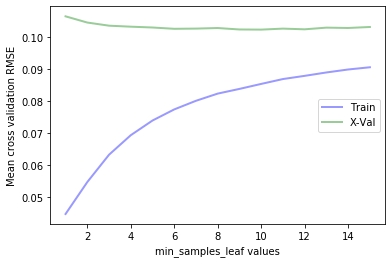

In [290]:
msl = range(1,16)
train_scores, test_scores = calc_params_regress(x_train,y_train, rf_Regression, msl, 'min_samples_leaf', 5)

n_estimators = 1 Train = 0.10109716227123963 Test = 0.1133164997161015
n_estimators = 2 Train = 0.09563075515683434 Test = 0.10812704440840706
n_estimators = 3 Train = 0.09401112771592417 Test = 0.1055226420214848
n_estimators = 4 Train = 0.09248886842668291 Test = 0.10457028339097826
n_estimators = 5 Train = 0.09179939626519278 Test = 0.10406201823595214
n_estimators = 6 Train = 0.09138119637989923 Test = 0.10424394365184982
n_estimators = 7 Train = 0.09145104796746226 Test = 0.10337023030628514
n_estimators = 8 Train = 0.09105422343877392 Test = 0.1028093275619399
n_estimators = 9 Train = 0.09068380959587477 Test = 0.10318737196456693
n_estimators = 10 Train = 0.09052155231204739 Test = 0.1027523015842716
n_estimators = 11 Train = 0.0904566683871113 Test = 0.10249859887292385
n_estimators = 12 Train = 0.09040943200215223 Test = 0.1024778679232569
n_estimators = 13 Train = 0.09039060801522217 Test = 0.10219496360705971
n_estimators = 14 Train = 0.09022947217067753 Test = 0.10205745074

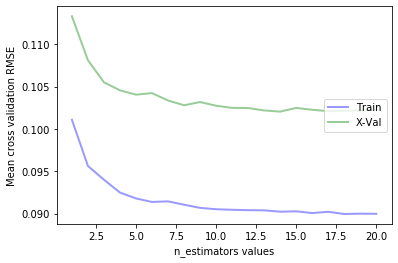

In [292]:
n_est=range(10,21)
train_scores, test_scores = calc_params_regress(x_train,y_train, rf_Regression, n_est, 'n_estimators', 5)

Above is shown the tuning results for minimum sample leafs and the number of estimators. The best performing value for minimum sample leafs was 10 and the number of estimators was 17. Both parameters, when tuned, offered an RMSE value improvement of ~.002. To see how these tuning parameters might interact and if an even better RMSE score can be found, I performed grid search on both of these parameters below.

In [305]:
parameters = {
    'min_samples_leaf': range(10,16),
    'n_estimators': range(15,21),
}

gs = GridSearchCV(rf_Regression, parameters, cv=3,scoring = 'neg_mean_squared_error')  #returned the negative MSE
gs.fit(x_train,y_train)
gs.best_params_, math.sqrt(gs.best_score_*-1)  #negative MSE is converted RMSE

({'min_samples_leaf': 10, 'n_estimators': 18}, 0.10182521212080042)

Using Grid Search for both the minimum samples per leaf and the number of estimators parameters, I was able to find a slightly better RMSE value of .1018. This overall is .003 better than the out of the box Random Forest Regressor which had an RMSE of .1048. Next I looked at improving the Gradient Boosted Decision Tree model.

learning_rate = 0.01 Train = 0.11392928404553215 Test = 0.11447222294609274
learning_rate = 0.05 Train = 0.1026528336251066 Test = 0.10497808318398591
learning_rate = 0.1 Train = 0.09777443710921745 Test = 0.10205396149686714
learning_rate = 0.2 Train = 0.09236091359531727 Test = 0.10018386482366695
learning_rate = 0.3 Train = 0.08928829692099438 Test = 0.10003562072657202
learning_rate = 0.4 Train = 0.08668738555051815 Test = 0.10048591742941504
learning_rate = 0.6 Train = 0.08355364731463324 Test = 0.1024069493025809
learning_rate = 0.7 Train = 0.08197366794768779 Test = 0.10518677783749728
learning_rate = 0.8 Train = 0.0809884181043826 Test = 0.10558408871656595
learning_rate = 0.9 Train = 0.08065899274630946 Test = 0.10864084515263583
learning_rate = 1.0 Train = 0.08056234775904493 Test = 0.10963268768676673
learning_rate = 1.3 Train = 0.08212188817747328 Test = 0.1172815137042692
learning_rate = 1.5 Train = 0.08475640533404243 Test = 0.12338779021269444
learning_rate = 1.8 Train =

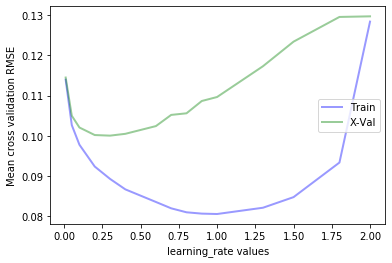

In [306]:
lr = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0, 1.3, 1.5, 1.8, 2.0]
train_scores, test_scores = calc_params_regress(x_train,y_train, gb_Regression, lr, 'learning_rate', 5)

Learning rate of .3 looked to be performing about .002 better than the RMSE from the out of the box GBDT model.

max_features = 10 Train = 0.0995700820212246 Test = 0.10308929303869618
max_features = 11 Train = 0.09938124199946823 Test = 0.10293994071219001
max_features = 12 Train = 0.09912422659820223 Test = 0.10278910875034356
max_features = 13 Train = 0.09905678584202648 Test = 0.10271863939089856
max_features = 14 Train = 0.09887568148191908 Test = 0.10271177534466214
max_features = 15 Train = 0.09893656731572419 Test = 0.10288321705569761
max_features = 16 Train = 0.09878680936100677 Test = 0.10249455067450644
max_features = 17 Train = 0.09858758511603705 Test = 0.10230506431533096
max_features = 18 Train = 0.09853583086700853 Test = 0.1023482258431212
max_features = 19 Train = 0.09844354900907953 Test = 0.10249811421311619
max_features = 20 Train = 0.09850211942520089 Test = 0.1024665913389182
max_features = 21 Train = 0.09841067761419889 Test = 0.10239520828415705
max_features = 22 Train = 0.09833878202976185 Test = 0.10234781474743167
max_features = 23 Train = 0.09834257161993502 Test = 0

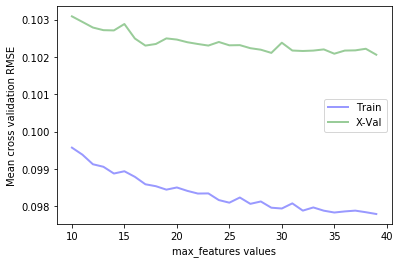

In [314]:
max_f=range(10,len(x_train.columns))
train_scores, test_scores = calc_params_regress(x_train,y_train, gb_Regression, max_f, 'max_features', 5)

Max number of features seemed to perform best but I wanted to double check how it performed in relation to the learning rate parameter with grid search.

In [315]:
parameters = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7],
    'max_features': range(33,40),
}

gs = GridSearchCV(gb_Regression, parameters, cv=3,scoring = 'neg_mean_squared_error')
gs.fit(x_train,y_train)
gs.best_params_, math.sqrt(gs.best_score_*-1)

({'learning_rate': 0.3, 'max_features': 34}, 0.10000793860988119)

Performing a grid search on both these parameters gave me the best RMSE I have seen yet from a regression model on this data set with a value of ~.100. Since this is the best performing model, I ran the GBDT one more time with these paramters to see what RMSE value I would get after 10 fold cross validation.

In [317]:
gb_Regression = GradientBoostingRegressor(learning_rate = .3, max_features=34, random_state = 33)
gb_Regression.fit(x_train,y_train)
pred = gb_Regression.predict(x_train)
err = abs(pred-y_train)
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(pred))
print("RMSE on Training Data: ", rmse_train)
rmse_10cv = cross_validate(gb_Regression, np.array(x_train), np.array(y_train), 10, verbose=True)
method_name = 'Gradient Boosted Regression'
print("\n")
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

RMSE on Training Data:  0.09080982487291175
Fold  1 RMSE: 0.1064
Fold  2 RMSE: 0.0940
Fold  3 RMSE: 0.0960
Fold  4 RMSE: 0.1011
Fold  5 RMSE: 0.0925
Fold  6 RMSE: 0.1062
Fold  7 RMSE: 0.0987
Fold  8 RMSE: 0.1042
Fold  9 RMSE: 0.0936
Fold 10 RMSE: 0.0995


Method: Gradient Boosted Regression
RMSE on training: 0.0908
RMSE on 10-fold CV: 0.0992


By looking at different models and parameter tuning on the best performing ones, I was able to create a regression model for predicting a piece of media's rating with a RMSE value of .099, which is improved from the initial RMSE scores which were often in the .108 to .120 range for the out of the box regression models. This translates to a model that predicts the IMDB rating at an error rate of .99 out of 10. I felt satisfied with the performance of this regression model and moved on to answering my final project question about developing a classification model for predicting whether or not a movie or TV show is an award winner.

# Classification - Predicting Award Winners

In [128]:
imdb_norm['Award Winner'] = np.where(imdb_norm['nrOfWins']>0, '1', '0')  #create a binary variable for if a piece of media has gotten at least 1 award
imdb_norm.head()

,imdbRating,ratingCount,duration,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,Action,...,Short,Sport,TalkShow,Thriller,War,Western,type_video.episode,type_video.movie,type_video.tv,Award Winner
0,0.860465,0.044504,0.047341,0.010753,0.000000,0.013287,0.016268,0.042929,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,0.848837,0.049739,0.083307,0.021505,0.002392,0.024476,0.018641,0.061616,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,0.860465,0.088912,0.134185,0.032258,0.009569,0.046853,0.072530,0.189899,0.666667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,0.848837,0.041179,0.093833,0.010753,0.002392,0.037063,0.020844,0.110606,1.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,0.895349,0.076893,0.076289,0.021505,0.000000,0.026573,0.031690,0.093939,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [131]:
imdb_clf_target = imdb_norm['Award Winner']
imdb_clf_records = imdb_norm.drop(['nrOfWins','Award Winner'],axis=1) #remove target variable related columns
imdb_clf_records.head()

,imdbRating,ratingCount,duration,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,Action,Adult,...,SciFi,Short,Sport,TalkShow,Thriller,War,Western,type_video.episode,type_video.movie,type_video.tv
0,0.860465,0.044504,0.047341,0.000000,0.013287,0.016268,0.042929,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.848837,0.049739,0.083307,0.002392,0.024476,0.018641,0.061616,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.860465,0.088912,0.134185,0.009569,0.046853,0.072530,0.189899,0.666667,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.848837,0.041179,0.093833,0.002392,0.037063,0.020844,0.110606,1.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.895349,0.076893,0.076289,0.000000,0.026573,0.031690,0.093939,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [132]:
clf_train, clf_test, clf_target_train, clf_target_test = train_test_split(imdb_clf_records, imdb_clf_target, test_size=0.2, random_state=33)

Using the normalized data, I created a new column of binary values based on the number of award wins where 1 represents an item having won at least 1 award and 0 represents an item having won 0 awards. I then set this binary feature column as my target variable and dropped this column plus the one it was based on so as to ensure I am not predicting this binary classification with the very data I used to create it. With the data ready to go, I began testing different classifiers out of the box to see what their model accuracy would be.

In [160]:
n_neighbors = 5

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(clf_train, clf_target_train)
measure_performance(clf_test, clf_target_test, knnclf, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.732 



In [145]:
dt = tree.DecisionTreeClassifier(criterion='gini')
dt = dt.fit(clf_train, clf_target_train)
measure_performance(clf_test, clf_target_test, dt, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.849 



In [144]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(clf_train, clf_target_train)
measure_performance(clf_test, clf_target_test, nbclf, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.785 



In [142]:
ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(clf_train, clf_target_train)
measure_performance(clf_test, clf_target_test, ldclf, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.766 



C:\Users\Kristal\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [178]:
rf = RandomForestClassifier(n_estimators=10, random_state=33)
rf = rf.fit(clf_train, clf_target_train)
measure_performance(clf_test, clf_target_test, rf, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.908 



In [163]:
ab = AdaBoostClassifier()
ab = ab.fit(clf_train, clf_target_train)
measure_performance(clf_test, clf_target_test, ab, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.902 



In [212]:
gb = GradientBoostingClassifier(n_estimators=10,
                                 max_depth=3, random_state=33).fit(clf_train, clf_target_train)
measure_performance(clf_test, clf_target_test, gb, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.908 



In [200]:
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5,
                           n_estimators=25, random_state=5)
bagging.fit(clf_train, clf_target_train)
measure_performance(clf_test, clf_target_test, bagging, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.810 



After trying KNN, Decision Tree, Naive Bayes, LDA classification, Random Forest, AdaBoost, Gradient Boosted Decision Trees(GBDT), and a Bagging KNN Classifier, Random Forest and GBDT worked best at predicting whether or not a piece of media is an award winner. I decided to move forward and explore the two ensemble methods of Random Forest and Adaboost a bit more through parameter tuning and see if I could further improve the accuracy of those models.

In [210]:
print(rf.get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 19, 'max_features': 8, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 13, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 16, 'n_jobs': None, 'oob_score': False, 'random_state': 33, 'verbose': 0, 'warm_start': False}


min_samples_leaf = 1 Train = 0.9900458248472506 Test = 0.9015274949083503
min_samples_leaf = 2 Train = 0.949949083503055 Test = 0.9041751527494908
min_samples_leaf = 3 Train = 0.9320264765784113 Test = 0.9057026476578411
min_samples_leaf = 4 Train = 0.9252036659877799 Test = 0.9034623217922606
min_samples_leaf = 5 Train = 0.9204938900203665 Test = 0.905193482688391
min_samples_leaf = 6 Train = 0.9190682281059063 Test = 0.9060081466395111
min_samples_leaf = 7 Train = 0.917438900203666 Test = 0.9056008146639511
min_samples_leaf = 8 Train = 0.9153004073319757 Test = 0.9056008146639509
min_samples_leaf = 9 Train = 0.9144602851323829 Test = 0.9065173116089614
min_samples_leaf = 10 Train = 0.9132128309572302 Test = 0.9068228105906314
min_samples_leaf = 11 Train = 0.9122708757637475 Test = 0.905804480651731
min_samples_leaf = 12 Train = 0.9115580448065174 Test = 0.9038696537678208
min_samples_leaf = 13 Train = 0.9112270875763746 Test = 0.9080448065173116
min_samples_leaf = 14 Train = 0.910819

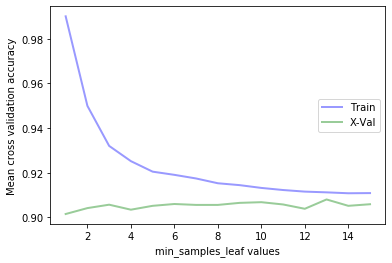

In [168]:
msl = range(1,16)
train_scores, test_scores = calc_params(clf_train, clf_target_train, rf, msl, 'min_samples_leaf', 5)

Best minimum samples leaf looked to be 13

max_depth = 1 Train = 0.8575101832993891 Test = 0.8557026476578411
max_depth = 2 Train = 0.8908859470468432 Test = 0.8897148676171079
max_depth = 3 Train = 0.9002291242362526 Test = 0.8991853360488798
max_depth = 4 Train = 0.8990071283095723 Test = 0.9001018329938901
max_depth = 5 Train = 0.905397148676171 Test = 0.9035641547861506
max_depth = 6 Train = 0.9021130346232178 Test = 0.8983706720977598
max_depth = 7 Train = 0.9062627291242362 Test = 0.904989816700611
max_depth = 8 Train = 0.9081720977596742 Test = 0.904480651731161
max_depth = 9 Train = 0.9087576374745417 Test = 0.9057026476578413
max_depth = 10 Train = 0.9087067209775966 Test = 0.9058044806517312
max_depth = 11 Train = 0.9089867617107943 Test = 0.9052953156822812
max_depth = 12 Train = 0.9093431771894094 Test = 0.9035641547861507
max_depth = 13 Train = 0.9101832993890021 Test = 0.9038696537678208
max_depth = 14 Train = 0.9093177189409369 Test = 0.905397148676171
max_depth = 15 Train = 0.9101578411405296 Test = 0.9053971486

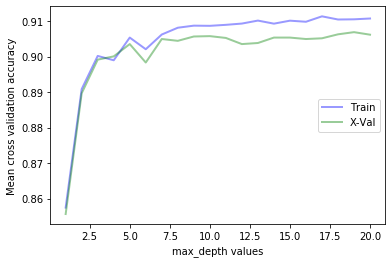

In [170]:
maxdepth=range(1,21)
train_scores, test_scores = calc_params(clf_train, clf_target_train, rf, maxdepth, 'max_depth', 5)

Best Depth seems to be 19.

max_features = 1 Train = 0.9923116089613033 Test = 0.8636456211812626
max_features = 2 Train = 0.9915478615071283 Test = 0.8880855397148677
max_features = 3 Train = 0.9916751527494908 Test = 0.8947046843177189
max_features = 4 Train = 0.9912932790224034 Test = 0.9
max_features = 5 Train = 0.9911659877800407 Test = 0.9023421588594704
max_features = 6 Train = 0.9900458248472506 Test = 0.9015274949083503
max_features = 7 Train = 0.9902240325865581 Test = 0.9037678207739308
max_features = 8 Train = 0.9900458248472506 Test = 0.905193482688391
max_features = 9 Train = 0.9904531568228105 Test = 0.9039714867617107
max_features = 10 Train = 0.9901221995926679 Test = 0.9050916496945011
max_features = 11 Train = 0.9897148676171079 Test = 0.90030549898167
max_features = 12 Train = 0.9899949083503057 Test = 0.9035641547861507
max_features = 13 Train = 0.9893839103869654 Test = 0.9011201629327903
max_features = 14 Train = 0.9899439918533606 Test = 0.9027494908350306
max_features = 15 Train = 0.99004

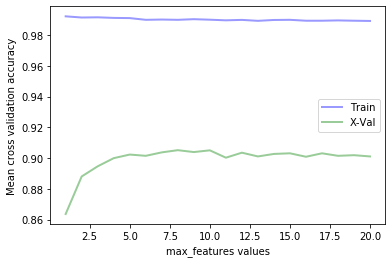

In [179]:
max_feat=range(1,21)
train_scores, test_scores = calc_params(clf_train, clf_target_train, rf, max_feat, 'max_features', 5)

Best max features seemed to be 8.

n_estimators = 1 Train = 0.944959266802444 Test = 0.8490835030549899
n_estimators = 2 Train = 0.9486761710794298 Test = 0.8664969450101833
n_estimators = 3 Train = 0.9742362525458249 Test = 0.880346232179226
n_estimators = 4 Train = 0.9726069246435844 Test = 0.889918533604888
n_estimators = 5 Train = 0.9839613034623218 Test = 0.8907331975560082
n_estimators = 6 Train = 0.9812118126272912 Test = 0.8972505091649694
n_estimators = 7 Train = 0.9882637474541752 Test = 0.8973523421588595
n_estimators = 8 Train = 0.9865071283095723 Test = 0.90030549898167
n_estimators = 9 Train = 0.9907586558044807 Test = 0.9005091649694501
n_estimators = 10 Train = 0.9893075356415479 Test = 0.9011201629327903
n_estimators = 11 Train = 0.9927189409368635 Test = 0.9012219959266803
n_estimators = 12 Train = 0.9909114052953157 Test = 0.9031568228105907
n_estimators = 13 Train = 0.9940173116089612 Test = 0.9027494908350306
n_estimators = 14 Train = 0.9929480651731162 Test = 0.9037678207739308
n_estimators = 15 Tr

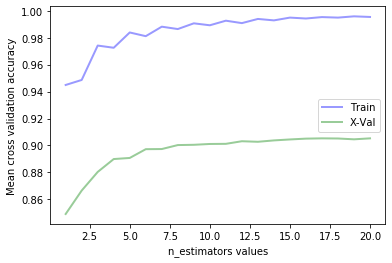

In [180]:
n_est=range(1,21)
train_scores, test_scores = calc_params(clf_train, clf_target_train, rf, n_est, 'n_estimators', 5)

Best number of estimators seemed to flatten out at 16. After tuning the 4 parameters shown above, I took the best performing parameter values and ran the Random Forest classifier again to see what my model accuracy would be. This is shown below.

In [189]:
rf = RandomForestClassifier(n_estimators=16, random_state=33, max_features=8, max_depth=19,min_samples_leaf=13 )
rf = rf.fit(clf_train, clf_target_train)
measure_performance(clf_test, clf_target_test, rf, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.913 



After optimizing parameters when looking individually at each,the accuracy only increased by .005, which isn't much. However, I wanted to look at what grid search would give me for these parameters. I decided to search around the ideal result found above so that grid search would run in an acceptable amount of time.

In [194]:
parameters = {
    'min_samples_leaf': range(10,16),
    'n_estimators': range(15,21),
    'max_depth': range(10,21),
}

gs = GridSearchCV(rf, parameters, cv=3)
gs.fit(clf_train, clf_target_train)
gs.best_params_, gs.best_score_

({'max_depth': 15, 'min_samples_leaf': 12, 'n_estimators': 20},
 0.9097759674134419)

Grid search actually gave a .004 less accuracy but I was forced to remove one parameter in order to improve the gridsearch run time. Max tuned accuracy seemed to be .913 for the random forest model. It was safe to say the Random Forest model wouldn't likely improve by any reasonable amount any further. At this point I moved on and wanted to look at the GBDT model and see if tuning it would produce better results than the Random Forest model.

In [216]:
gb = GradientBoostingClassifier(n_estimators=10,
                                 max_depth=3, random_state=33).fit(clf_train, clf_target_train)
measure_performance(clf_test, clf_target_test, gb, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.908 



In [211]:
print(gb.get_params())

{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 2.0, 'loss': 'deviance', 'max_depth': 3, 'max_features': 20, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 45, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 0, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


learning_rate = 0.01 Train = 0.9039205702647658 Test = 0.9038696537678208
learning_rate = 0.05 Train = 0.9041751527494908 Test = 0.9032586558044807
learning_rate = 0.1 Train = 0.9092922606924644 Test = 0.904887983706721
learning_rate = 0.2 Train = 0.9155040733197557 Test = 0.905193482688391
learning_rate = 0.3 Train = 0.9200356415478617 Test = 0.904175152749491
learning_rate = 0.4 Train = 0.9234725050916497 Test = 0.9017311608961304
learning_rate = 0.6 Train = 0.9287678207739308 Test = 0.8979633401221996
learning_rate = 0.7 Train = 0.9315682281059063 Test = 0.8979633401221996
learning_rate = 0.8 Train = 0.9308553971486763 Test = 0.894806517311609
learning_rate = 0.9 Train = 0.9311608961303464 Test = 0.8919551934826885
learning_rate = 1.0 Train = 0.9320519348268839 Test = 0.8946028513238289
learning_rate = 1.3 Train = 0.9302189409368635 Test = 0.8885947046843178
learning_rate = 1.5 Train = 0.9295061099796336 Test = 0.8856415478615072
learning_rate = 1.8 Train = 0.9026476578411404 Test =

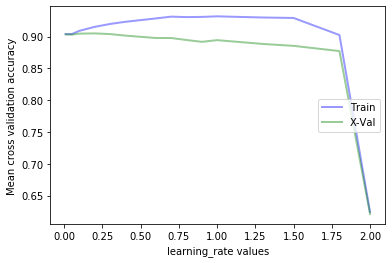

In [208]:
lr = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0, 1.3, 1.5, 1.8, 2.0]
train_scores, test_scores = calc_params(clf_train, clf_target_train, gb, lr, 'learning_rate', 5)

Learning rate peaked at .2.

max_features = 1 Train = 0.8472505091649694 Test = 0.8440936863543789
max_features = 2 Train = 0.8664714867617107 Test = 0.8636456211812626
max_features = 3 Train = 0.8358961303462322 Test = 0.8326883910386966
max_features = 4 Train = 0.8706466395112017 Test = 0.8687372708757637
max_features = 5 Train = 0.8757637474541753 Test = 0.8682281059063136
max_features = 6 Train = 0.9042769857433809 Test = 0.9033604887983706
max_features = 7 Train = 0.9037932790224034 Test = 0.9037678207739308
max_features = 8 Train = 0.9038187372708759 Test = 0.9036659877800407
max_features = 9 Train = 0.902673116089613 Test = 0.9008146639511201
max_features = 10 Train = 0.9037678207739306 Test = 0.9037678207739308
max_features = 11 Train = 0.9037932790224034 Test = 0.9038696537678208
max_features = 12 Train = 0.9044297352342159 Test = 0.9046843177189409
max_features = 13 Train = 0.9037169042769857 Test = 0.9032586558044807
max_features = 14 Train = 0.9037678207739308 Test = 0.9037678207739308
max_features = 1

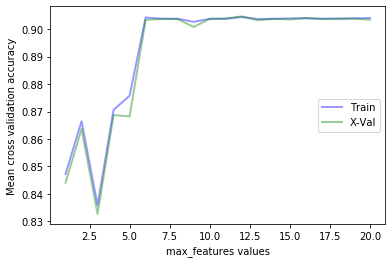

In [217]:
max_features = range(1,21)
train_scores, test_scores = calc_params(clf_train, clf_target_train, gb, max_features, 'max_features', 5)

Peaks at 12 max features.

n_estimators = 1 Train = 0.7085794297352341 Test = 0.7005091649694501
n_estimators = 2 Train = 0.8412423625254583 Test = 0.834623217922607
n_estimators = 3 Train = 0.895061099796334 Test = 0.8908350305498983
n_estimators = 4 Train = 0.905040733197556 Test = 0.9039714867617107
n_estimators = 5 Train = 0.9046588594704683 Test = 0.9037678207739308
n_estimators = 6 Train = 0.9040987780040733 Test = 0.9033604887983706
n_estimators = 7 Train = 0.9038696537678208 Test = 0.9034623217922606
n_estimators = 8 Train = 0.9037678207739306 Test = 0.9033604887983706
n_estimators = 9 Train = 0.9039714867617107 Test = 0.9035641547861507
n_estimators = 10 Train = 0.9040733197556008 Test = 0.9034623217922606
n_estimators = 11 Train = 0.9040224032586558 Test = 0.9035641547861507
n_estimators = 12 Train = 0.9041242362525459 Test = 0.9036659877800407
n_estimators = 13 Train = 0.9041242362525457 Test = 0.9033604887983706
n_estimators = 14 Train = 0.9043024439918532 Test = 0.9031568228105906
n_estimators = 15 

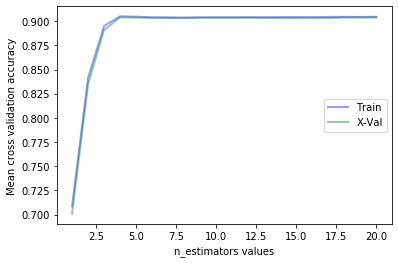

In [218]:
n_est=range(1,21)
train_scores, test_scores = calc_params(clf_train, clf_target_train, gb, n_est, 'n_estimators', 5)

Peaked at 4 estimators.

min_samples_leaf = 1 Train = 0.9037932790224031 Test = 0.9037678207739308
min_samples_leaf = 2 Train = 0.9039460285132384 Test = 0.9037678207739308
min_samples_leaf = 3 Train = 0.9039460285132384 Test = 0.9037678207739308
min_samples_leaf = 4 Train = 0.9039460285132384 Test = 0.9037678207739308
min_samples_leaf = 5 Train = 0.9039460285132384 Test = 0.9037678207739308
min_samples_leaf = 6 Train = 0.9039460285132384 Test = 0.9037678207739308
min_samples_leaf = 7 Train = 0.9039460285132384 Test = 0.9037678207739308
min_samples_leaf = 8 Train = 0.9039460285132384 Test = 0.9037678207739308
min_samples_leaf = 9 Train = 0.9039460285132384 Test = 0.9037678207739308
min_samples_leaf = 10 Train = 0.9039460285132384 Test = 0.9037678207739308
min_samples_leaf = 11 Train = 0.9039460285132384 Test = 0.9037678207739308
min_samples_leaf = 12 Train = 0.9039460285132384 Test = 0.9038696537678208
min_samples_leaf = 13 Train = 0.9039460285132384 Test = 0.9038696537678208
min_samples_leaf = 14 Train = 0.90

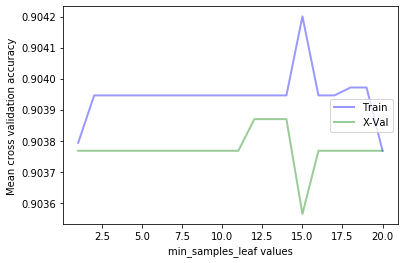

In [214]:
msl = range(1,21)
train_scores, test_scores = calc_params(clf_train, clf_target_train, gb, msl, 'min_samples_leaf', 5)

Very little accuracy change but peeked at 12.

In [219]:
gb = GradientBoostingClassifier(n_estimators=4,
                                 max_depth=3, random_state=33, min_samples_leaf=12, max_features=12,learning_rate=.2).fit(clf_train, clf_target_train)
measure_performance(clf_test, clf_target_test, gb, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.908 



Using the peak values from performing parameter cross validations, the model did not improve at all. I tried one more time with grid search around the parameter peaks to see if, through parameter interaction, I could get a better accuracy scoring than testing the parameters individually.

In [220]:
parameters = {
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': range(2, 6),
    'max_features': range(10,15),
}

gs = GridSearchCV(gb, parameters, cv=3)
gs.fit(clf_train, clf_target_train)
gs.best_params_, gs.best_score_

({'learning_rate': 0.2, 'max_features': 12, 'n_estimators': 5},
 0.9042769857433809)

Gridsearch did not offer any improved sets of parameters. Max tuned accuracy ended up being .908 for the GBDT model.

After all of our classification modeling and parameter tuning was complete, the final best performing model was the Random Forest classifier shown below with 16 estimators, 8 max features, a max depth of 19, and minimum samples per leaf of 13. It's  accuracy, classification report, and feature importance graph are shown below. The resulting accuracy of this model is 91.3% which is a .005% increase over the out of the box random forest model and is 5%-16% better than the accuracy scores produced by the out of the box non-ensemble classification models. The three most important features for this model were the number of nominations, the amount of ratings a piece of media has received, and the number of news articles on the piece of media. Seeing number of nominations was no surprise given that media cannot win awards if it is not nominated for them. The other top two features, number of news articles and ratings received, implies that a piece of media's overall popularity may be the key to classifying it as an "Award Winner".

In [240]:
rf = RandomForestClassifier(n_estimators=16, random_state=33, max_features=8, max_depth=19,min_samples_leaf=13 )
rf = rf.fit(clf_train, clf_target_train)
measure_performance(clf_test, clf_target_test, rf, show_confussion_matrix=False, show_classification_report=True)

Accuracy:0.913 

Classification report
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1308
           1       0.94      0.86      0.90      1147

    accuracy                           0.91      2455
   macro avg       0.92      0.91      0.91      2455
weighted avg       0.91      0.91      0.91      2455
 



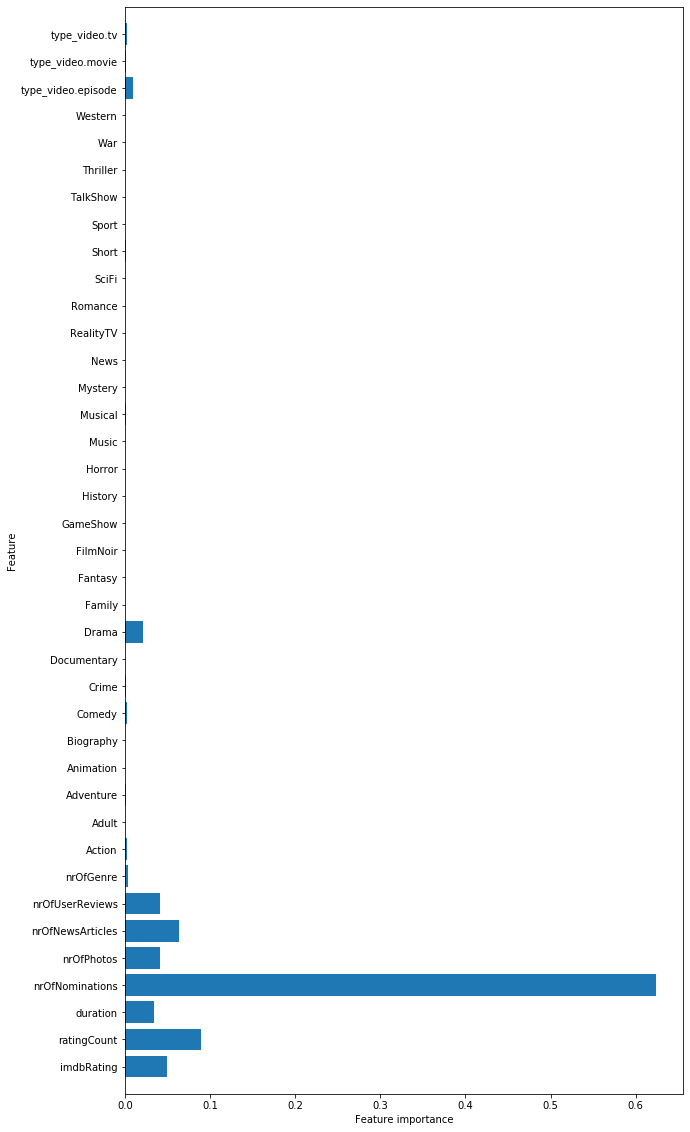

In [243]:
plot_feature_importances(rf, len(imdb_clf_records.columns), imdb_clf_records.columns)

# Conclusion

With the regression and classification results in mind there is more work that can be done going forward. Further research might include, obtaining other feature information about movies and TV shows so that more of the features in our dataset are useful for the models. Additionally, developing further models to predict the number of nominations media receives, and determining what features have the most effect on that model, could be useful for digging deeper into predicting award winners. These future studies and resulting models could be useful to entertainment companies who are seeking to understand what factors may predictably play a part in the content they create being rated highly or driving winning of awards. Both would increase their reputation and value.